# 케라스를 사용한 인공 신경망 소개

이번 장에서는 인공 신경망의 초창기 구조를 간단히 소개하며, 다층 퍼셉트론(MLP)을 설명.

케라스를 API를 사용해 인공 신경망을 구현하는 방법을 알아봅시다.

12장에서 좀 더 많이 활용할 수 있음.

**인공 신경망 (Artificial Neural Network, ANN)**

* 인공 신경망은 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델
* 딥러닝의 핵심
* 다재다능하고 강력하고 확장성이 좋다

인공 신경망이 다시 각광받게 된 이유

* 데이터가 많아졌다.(규모가 크고 복잡한 문제에서 다른 머신러닝 기법보다 좋은 성능)
* 컴퓨터 하드웨어가 크게 발전(GPU, 클라우드 플랫폼)
* 훈련 알고리즘이 향상
* 일부 인공 신경망의 이론상 제한이 실전에서는 문제가 되지 않는다.
* 투자와 진보의 선순환

In [2]:
import numpy as np
import os

import tensorflow as tf
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 생물학적 뉴런에서 인공 뉴런까지

### 생물학적 뉴런

* 세포는 핵을 포함하는 세포체와 복잡한 구성 요소

* 수상돌기라는 나뭇가지 모양의 돌기와 축삭돌기라는 아주 긴 돌기 하나

* 축삭돌기의 끝은 축삭끝가지라는 여러 가지로 나뉘고, 이 가지 끝은 시냅스 말단(또는 시냅스)이라는 미세한 
  구조로 다른 뉴런의 수상돌기나 세포체에 연결

* 뉴런은 활동 전위 또는 간단히 신호라고 부르는 짧은 전기 자극을 만들고, 이 신호는 축삭돌기를 따라 
  이동하여 시냅스가 신경 전달물질이라는 화학적 신호를 발생하게 함

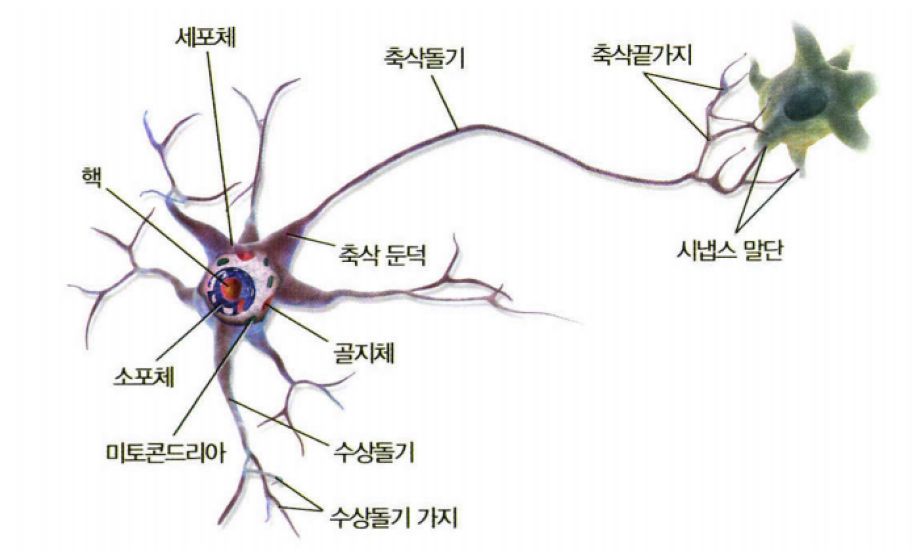

In [3]:
import matplotlib.image as mpimg

filename = "ann_1.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

### 뉴런을 사용한 논리 연산

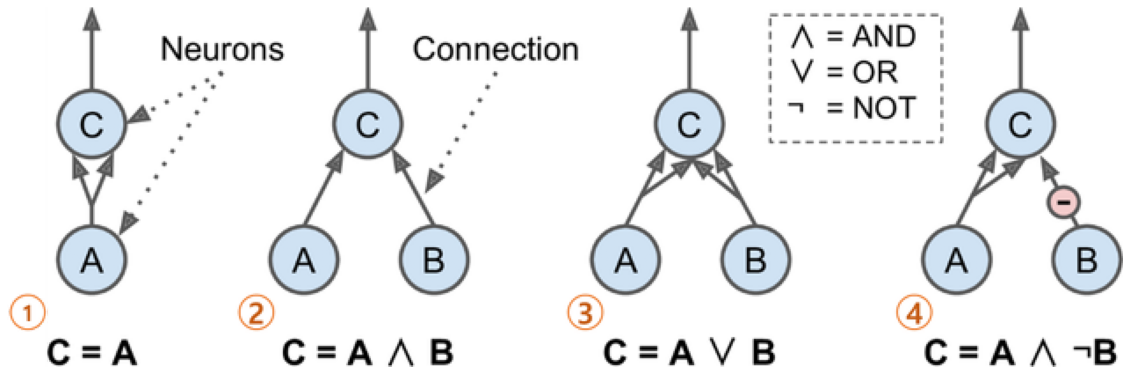

In [4]:
filename = "ann_3.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 첫번째 네트워크는 항등함수. A와 C는 활성화되면 둘 다 활성화되고 꺼지면 둘 다 꺼짐.

* 두번째 네트워크는 논리곱 연산 수행. A와 B 둘 다 모두 실행되야 C 활성화

* 세번째 네트워크는 논리합 연산 수행. A나 B 둘 중 하나가 실행되면 C 활성화

* 네번쨰 네트워크는 논리곱 + 논리부정 수행. 만약 A가 항상 활성화면 only 논리부정이라

  B 활성화이면 C 비활성화, B 비활성화이면 C 활성화.

### 퍼셉트론

입력변수의 값들에 대한 가중치의 합에 대한 활성함수를 적용하여 최종 결과물 생성

TLU(threshold logic unit) 또는 LTU(linear threshold unit)이라고 불림

=> 입력의 가중치 합을 계산 ($z = w_1x_1 + w_2x_2 + w_nx_n = x^Tw$)한 뒤 

  계산된 합에 계단함수를 적용해 결과 출력. 즉 $h_w(x) =step(z)$

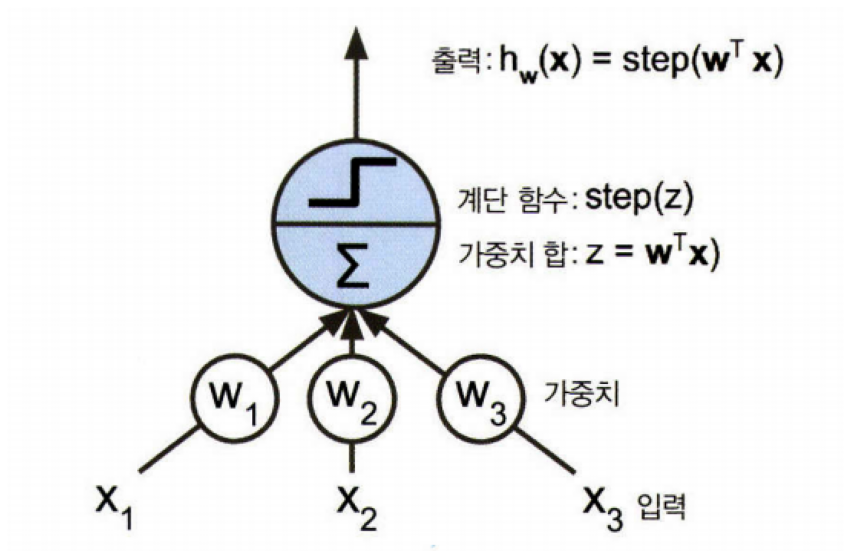

In [5]:
filename = "ann_4.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

퍼셉트론에서 가장 널리 사용되는 계단 함수 = 헤비사이드 계단 함수(가끔 부호 함수를 대신 사용)

**Equation 10-1: Common step functions used in Perceptrons**

$
\begin{split}
\operatorname{heaviside}(z) =
\begin{cases}
0 & \text{if }z < 0\\
1 & \text{if }z \ge 0
\end{cases} & \quad\quad
\operatorname{sgn}(z) =
\begin{cases}
-1 & \text{if }z < 0\\
0 & \text{if }z = 0\\
+1 & \text{if }z > 0
\end{cases}
\end{split}
$

퍼셉트론은 층이 하나뿐인 TLU로 구성. 각 TLU은 모든 입력에 연결되어 있음.

한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 이를 

완전 연결층(fully connected layer) 또는 밀집 층(dense layer) 라고 부름.

퍼셉트론의 입력은 입력 뉴런이라 불리는 특별한 통과 뉴런에 주입됨.

|

이 뉴런은 어떤 입력이 주입되든 그냥 출력으로 통과시킴.

입력층은 모두 입력뉴런으로 구성됨. 보통 편향이 더해짐 ($x_0 = 1$).

전형적으로 이 편향 특성은 항상 1을 출력하는 특별한 종류의 뉴런인 편향 뉴런으로 표현됨.

아래 그림은 입력 2개와 출력 3개로 구성된 퍼셉트론.

해당 퍼셉트론은 샘플을 3개의 다른 이진클래스로 동시에 분류할 수 있으므로 다중 레이블 분류기임.

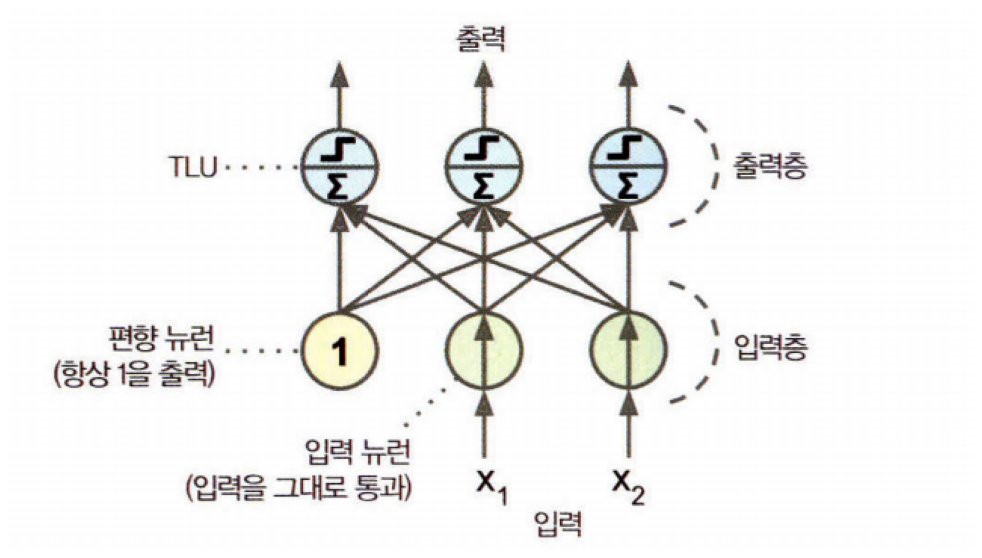

In [6]:
filename = "ann_5.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

선형대수학 덕분에 [10-2]를 사용하여 한 번에 여러 샘플에 대해 인공뉴런 층의 출력을 효율적으로 계산가능.

|

**10-2 완전 연결 층의 출력 계산**

$
h_{W,b}(X)=\phi(XW+b)
$

|

* 이전과 마찬가지로 X는 입력 특성의 행렬을 나타냄. 이 행렬은 행은, 열은 특성

* 가중치 행렬 W는 편향 뉴런을 제외한 모든 연결 가중치를 포함. 
  
  이 행렬의 행은 입력 뉴런, 열은 출력층에 있는 인공 뉴런에 해당함.

* 편향벡터 b는 편향뉴런과 인공뉴런사이의 모든 연결 가중치를 포함. 인공뉴런마다 하나의 편향값 존재.

#### **"헤브의 규칙"**을 요약한다면

'서로 활성화되는 세포가 서로 연결된다'. 즉, 두 뉴런이 동시에 활성화될 때마다 

이들 사이의 연결 가중치가 증가하는 경향이 있음.

퍼셉트론은 어떻게 훈련될까요? 이는 헤브의 규칙에 영감을 많이 받았는데

헤브의 규칙에 따르면 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측을 만들고 

잘못된 예측을 하는 모든 출력 뉴런에 대해 입력에 연결된 가중치를 강화

|

**Equation 10-3: Perceptron learning rule (weight update)**

$
{w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$

|

* $w_{i,j}$ 는 i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치

* $x_i$ 는 현재 훈련 샘플의 i번째 뉴런의 입력값

* $\hat{y_j}$ 는 현재 훈련 샘플의 j번째 출력 뉴런의 출력값

* $y_j$는 현재 훈련 샘플의 j번째 출력 뉴런의 타깃값

* $\eta$는 학습률

|

각 출력 뉴런의 결정경계는 선형이므로 퍼셉트론(로지스틱 회귀처럼)도 복잡한 패턴을 학습하지 못함.

하지만 로젠블란트는 훈련샘플이 선형적으로 구분될 수 있다면 이 알고리즘이

정답에 수렴한다는 것을 증명함. (= 퍼셉트론 수렴 이론)

사이킷런은 하나의 TLU 네트워크를 구현한 Perceptron 클래스를 제공.

이 파이썬 클래스도 동일한 방식으로 사용할 수 있음. (4장에서 소개한 붓꽃 데이터셋을 사용)

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\NICE\AppData\Local\Temp\ipykernel_12448\2133184270.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


그림 저장: perceptron_iris_plot


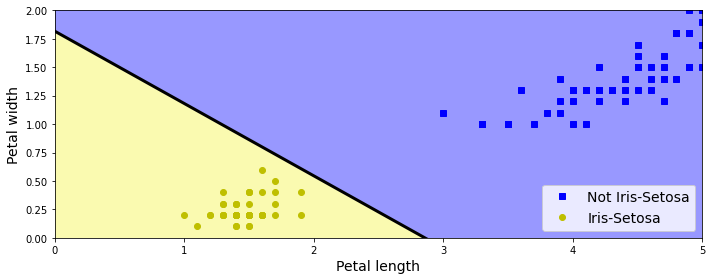

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

아마 퍼셉트론 학습 알고리즘이 확률적 경사 하강법과 매우 닮았다고 생각될 것.

Perceptron 클래스는 매개변수가 loss="perceptron", learning_rate="constant", 

eta0=1(학습률), penalty=None(규제없음)인 SGDClassifier와 같음.

|

로지스틱 회귀 분류기와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을

기준으로 예측값을 만듦. 이런 이유로 로지스틱 회귀가 선호됨.

### 다층 퍼셉트론과 역전파

다층 퍼셉트론(MLP) - 퍼셉트론을 여러 개 쌓아올린 인공 신경망

심층 신경망(DNN) - 은닉층을 여러 개 쌓아올린 인공 신경망

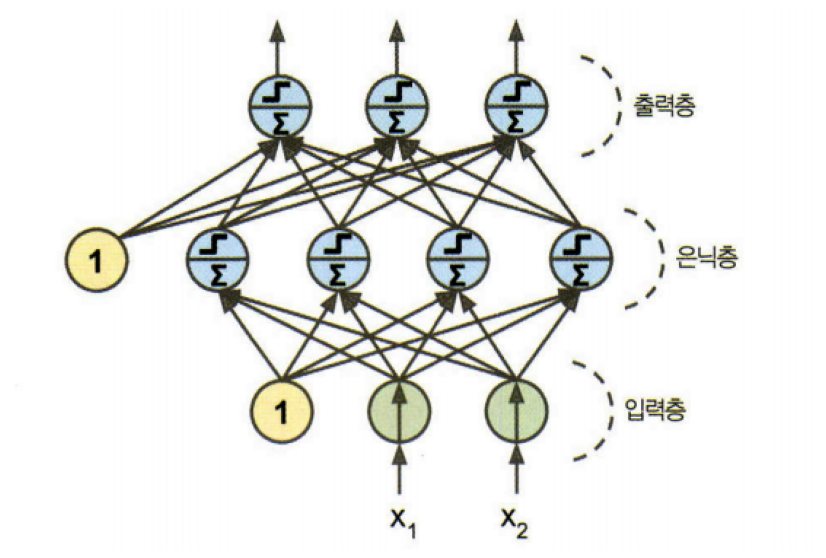

In [9]:
filename = "ann_7.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

1986년에 역전파 훈련 알고리즘 논문이 소개됨.

다층 퍼셉트론을 훈련하는 을 간단히 말하면 이 알고리즘은 효율적인 기법으로 그레디언트를

자동으로 계산하는 경사하강법. 네트어크를 2번 통과하는 것만으로 이 역전파 알고리즘은 

모든 모델 파라미터에 대한 네트워크 오차의 그레디언트를 계산가능. 

|

다른 말로 하면 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있음.

그레디언트 구하고 나면 평범한 경사하강법을 수행함.

---

이 알고리즘을 더 자세히 살펴보자면

하나의 미니배치씩 진행해 전체훈련세트를 처리함. 이 과정을 여러번 반복함. 각 반복을 에포크라고 함.

각 미니배치는 네트워크의 입력층으로 전달되어 첫번재 은닉층으로 보내짐.

그다음 해당 층에 있는 모든 뉴런의 출력을 계산함. 이 결과는 다음 층으로 전달됨.

다시 이 층의 출력을 계산하고 결과는 다음 층으로 전달됨. 이후로 마지막까지 반복 => 정방향 계산

역방향 계산을 위해 중간계산값을 모두 저장하는 것 외에는 예측을 만드는 것과 정확히 같음.

|

그다음 알고리즘이 네트워크의 출력 오차를 측정.

이제 각 출력연결이 이 오차에 기여하는 정도를 계산. 연쇄법칙을 사용하면 빠르고 정확히 수행함.

이 알고리즘은 또 다시 연쇄 법칙을 사용해 이전 층의 연결 가중치가 이 오차의 기여 정도에

얼마나 기여했는지 측정. 이렇게 입력층에 도달할 때까지 역방향으로 계속됨. => 역방향 계산

이런 역방향 단계는 오차 그레디언트를 거꾸로 전파함으로써 모든 연결 가중치에 대한 오차 그레디언트를 측정.

|

마지막으로 알고리즘은 경사하강법을 수행해 방금 계산한 오차 그레디언트를 사용해 

네트워크에 모든 연결 가중치를 수정

---

위에 내용을 요약하자면 각 훈련샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 (정방향 계산)

오차를 측정. 그런 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정함. (역방향 계산)

마지막으로 이 오차가 감소하도록 가중치를 조정함(경사하강법 단계).

이 알고리즘을 잘 작동하고자 논문 저자들은 다층 퍼셉트론 구조에 중요한 변화를 줌.

계단함수를 로지스틱 함수 $\sigma(z)=1/(1+\exp{(-z)})$ 로 바꾼 것.

계단함수에는 수평선밖에 없으니 계산할 그레디언트가 없음.(경사하강법이 평편한 곳을 이동할 순 없기때문).

반면 로지스틱 함수는 어디서든지 0이 아닌 그레디언트가 잘 정의되어 있음.

널리 쓰이는 다른 2개의 활성화 함수는 다음과 같음.

---

* 하이퍼볼릭 탄젠트 함수 (쌍곡 탄젠트 함수)

* ReLU 함수

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


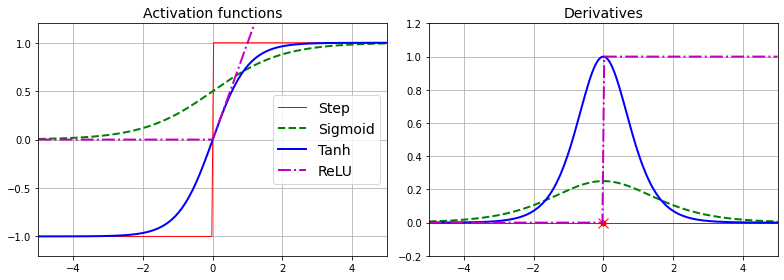

In [11]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

### 회귀를 위한 다층 퍼셉트론

* 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 한다.
* 항상 양수여야 한다면 출력층에 ReLU 활성화 함수를 사용할 수 있다.
* 또는 softplus 활성화 함수를 사용하여 z가 음수 일 때 0에 가까워지고 큰 양수 일수록 
  z에 가깝게 할 수 있다.
* 어떤 범위 한의 값을 예측하고 싶다면 로지스틱 함수나 하이퍼볼릭 탄젠트 함수를 사용하고 
  레이블의 스케일을 적절한 범위로 조정할 수 있다.
* 훈련에 사용하는 손실 함수는 전형적으로 평균 제곱 오차(MSE)
* 하지만 훈련 세트에 이상치가 많다면 평균 절댓값 오차(MAE)를 사용할 수 있다.
  (또는 둘을 조합한 후버(Huber)손실 사용)
* 회귀 MLP의 전형적인 구조

하이퍼파라미터 
) 일반적인 값

입력 뉴런 수 )
특성마다 하나

은닉층 수	)
문제에 따라 다름, 일반적으로 1에서 5 사이

은닉층의 뉴런 수 )
문제에 따라 다름, 일반적으로 10에서 100사이

출력 뉴런 수 )
예측 차원마다 하나

은닉층의 활성화 함수 )
ReLU(또는 SELU)

출력층의 활성화 함수 )
없음, 또는 (출력이 양수일 때) ReLU/softplus 나 (출력을 특정 범위로 제한할 때) logistic/tanh 사용

손실 함수	) 
MSE나 (이상치가 있다면) MAE/Huber

### 분류를 위한 다층 퍼셉트론

* 이진 분류

로지스틱 활성화 함수를 가진 출력 뉴런 하나 필요. 

출력은 0과 1사이의 실수로 이를 양성 클래스에 대한 예측 확률로 해석.

* 다중 레이블 이진 분류

로지스틱 활성화 함수를 가진 출력 뉴런 여러개로 다중 레이블 분류가 가능. 

각 샘플이 3개 이상의 클래스 중 한 클래스만 속하여야 한다면 출력층에 소프트 맥스 활성화 함수를 사용. 

모든 예측 확률을 0과 1사이로 만들고 더했을 때 1이 되도록 한다. 이를 다중 분류라고 함. 

손실 함수로는 일반적으로 크로스 엔트로피 손실(또는 로그 손실)을 선택

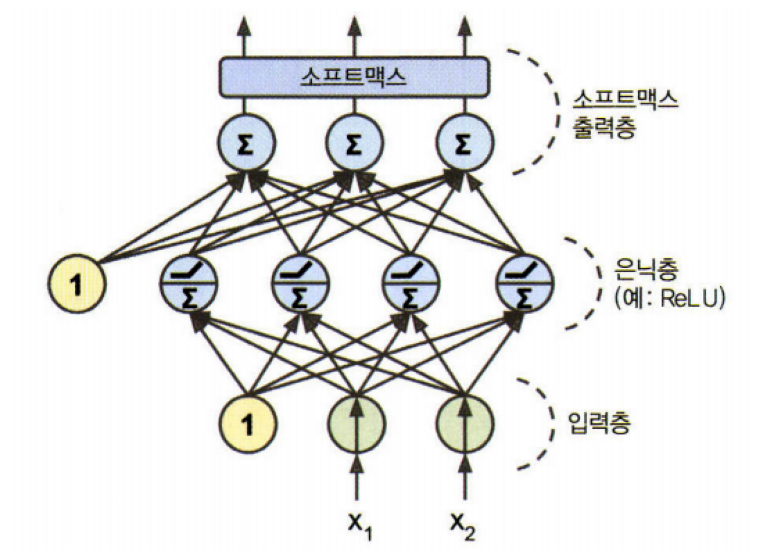

In [12]:
filename = "ann_9.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 분류 MLP의 전형적인 구조

---

하이퍼파라미터       | 이진 분류       | 다중 레이블 분류 | 다중 분류

입력층과 은닉층      | 회귀와 동일	   | 회귀와 동일	    | 회귀와 동일

출력 뉴런 수         | 1개	          | 레이블마다 1개   | 클래스마다 1개

출력층의 활성화 함수  | 로지스틱 함수   | 로지스틱 함수    | 소프트맥스 함수

손실 함수            | 크로스 엔트로피 | 크로스 엔트로피	| 크로스 엔트로피

## 케라스로 다층 퍼셉트론 구현

In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


### 시퀀셜 API를 사용해 이미지 분류기 만들기

우선 데이터셋을 적재해야 함. 이 장에서는 패션 MNIST를 다룰 것임.

MNIST(28 $\times$ 28 픽셀 크기의 흑백이미지 7만개)와 형태가 정확히 같지만 손글씨 숫자가 아니라 패션 아이템을 나타내는 이미지. 

클래스마다 샘플이 더 다양하므로 MNIST보다 훨씬 어려운 문제. 

예를 들면 간단한 선형모델이 MNIST에서 92% 정확도를 내지만 패션 MNIST에서는 83% 정도만 달성

**케라스를 사용하여 데이터셋 적재하기**

케라스는 MNIST, 패선 MNIST, 2장에서 사용한 캘리포니아 주택 데이터셋을 포함해

널리 사용되는 데이터셋을 다운로드하고 적재할 수 있는 유틸리티 함수를 제공.

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:

In [16]:
X_train_full.shape

(60000, 28, 28)

각 픽셀의 강도는 바이트(0~255)로 표현됩니다:

In [17]:
X_train_full.dtype

dtype('uint8')

전체 훈련 세트를 검증 세트와 (조금 더 작은) 훈련 세트로 나누어 보죠. 또한 픽셀 강도를 255로 나누어 0~1 범위의 실수로 바꾸겠습니다.

In [18]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

맷플롯립의 `imshow()` 함수와 `'binary'` 컬러맵을 사용해 이미지를 출력할 수 있습니다:

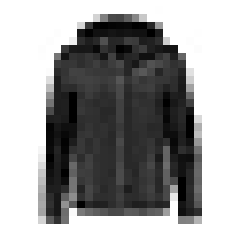

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [20]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [22]:
class_names[y_train[0]]

'Coat'

그림 저장: fashion_mnist_plot


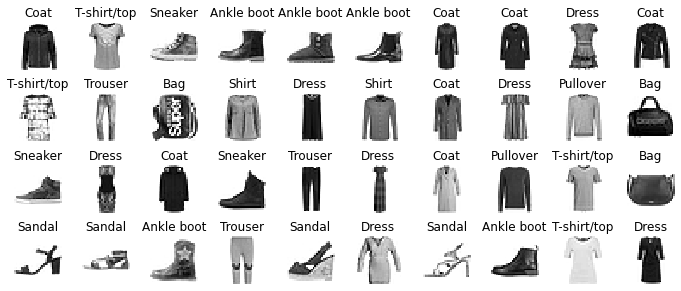

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

**시퀀셜 API를 사용해 모델 제작**

이제 신경망을 만들어보겠습니다. 다음은 2개의 은닉층으로 이루어진 분류용 다층 퍼셉트론임.

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

코드를 하나씩 살펴보면

* 첫번째 줄은 Sequential 모델을 만듦. 이 모델은 가장 간단한 케라스의 신경망 모델임.
  순서대로 연결된 층을 일렬로 쌓아서 구성. 이를 시퀀셜 API라고 함.

* 그다음 첫번째 층을 만들고 모델에 추가. Flatten 층은 입력 이미지를 1D배열로 변환함.
  즉, 입력데이터 X를 받으면 X.reshape(-1, 28*28)을 계산함.
  이층은 어떤 모델 파라미터도 가지지 않고 간단한 전처리를 수행할 뿐. 모델의 첫번째 층이므로
  input_shape를 지정해야함. 여기에는 배치 크기를 제외하고 샘플의 크기만 써야함.
  또는 첫번째 층으로 input_shape=[28, 28]로 지정된 keras.layers.InputLayer 층을 추가할 수도 있음.

* 그다음 뉴런 300개를 가진 Dense 은닉층을 추가함. 이 층은 ReLU 활성화함수를 사용.
  Dense 층마다 각자 가중치 행렬을 관리함. 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함됨.
  또한(뉴런마다 하나씩 있는) 편향도 벡터로 관리함. 이 층은 입력데이터를 받으면 [식 10-2]를 계산.

* 다음 뉴런 100개를 가진 두번째 Dense 은닉층을 추가함. 역시 ReLU 활성화 함수를 사용.

* 마지막으로 (클래스마다 하나씩) 뉴런 10개를 가진 Dense 출력층을 추가함.
  (배타적인 클래스이므로) 소프트맥스 활성화 함수를 사용.

#### TIP

activation="relu"로 지정하는 것과 activation=keras.activations.relu로 지정하는 것은 동일함.

keras.activations 패키지에 다른 활성화 함수가 많음. 이 중에서 많은 함수를 이 책에서 사용할 것.

전체 리스트 : https://keras.io/activations 를 참고

앞에서와 같이 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있음.

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

---

**keras.io의 예제 코드 사용하기**

keras.io 문서에 있는 예제 코드는 tf.keras에서 잘 작동함. 하지만 임포트 명령을 수정해야 함.

In [29]:
from keras.layers import Dense
output_layer = Dense(10)

위 임포트 명령을 다음과 같이 바꾸어야 함.

In [30]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [31]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

어떤 패키지를 사용하는지 쉽게 할 수 있고 표준 클래스와 사용자 정의 클래스 사이에서

혼란을 피할 수 있음. 이런 이유로 이 책에서는 이 방식을 사용함. 실전에서 필자는 앞선 방식을 더 선호함.

---

모델의 summary()는 모델에 있는 모든 층을 출력함. 

각 층의 이름(층을 만들 때 지정하지 않으면 자동으로 생성됨), 
출력크기(None은 배치 크기에 어떤 값도 가능), 파라미터 개수가 함께 출력됨.

마지막에 훈련되는 파라미터와 훈련되지 않은 파라미터를 포함해 전체 파라미터 개수를 출력.

이 예에서는 훈련되는 파라미터만 있음(11장에서 훈련되지 않는 파라미터가 있는 예제를 살펴봄).

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense 층은 보통 많은 파라미터를 가짐. 예를 들어 첫번째 은닉층은 784$\times$300개의 연결 가중치와 

300개의 편향을 가짐. 이를 더하면 무려 파라미터가 235,500개나 됨.

이런 모델은 훈련데이터를 학습하기 충분한 유연성을 가짐. 또한 과대적합의 위험을 갖는다는 의미.

특히 훈련데이터가 많지 않을 경우에 그렇습니다. 이 문제는 나중에 다시 살펴봅니다.

|

모델에 있는 층의 리스트를 출력하거나 인덱스로 층을 쉽게 선택할 수 있음.

In [34]:
model.layers

In [35]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [36]:
model.get_layer(hidden1.name) is hidden1

True

층의 모든 파라미터는 get_weight()와 set_weight()를 사용해 접근할 수 있음.

Dense 층의 경우 연결 가중치와 편향이 모두 포함되어 있음.

In [37]:
weights, biases = hidden1.get_weights()

In [38]:
weights

array([[ 0.05338524,  0.07037364,  0.00736121, ...,  0.04105302,
         0.05163854, -0.04554283],
       [ 0.0435617 , -0.04125525, -0.06858058, ..., -0.02687883,
         0.07314536,  0.00619455],
       [-0.00738098,  0.05510294,  0.02453812, ..., -0.02574069,
        -0.01978459, -0.02151283],
       ...,
       [ 0.02265867,  0.03670219,  0.03459033, ...,  0.04275008,
        -0.01787291,  0.06894496],
       [-0.00909495, -0.05069227, -0.0100223 , ..., -0.04856382,
        -0.01404255,  0.03638802],
       [ 0.0464774 ,  0.00101737, -0.01633277, ..., -0.06630282,
         0.0392064 ,  0.06362939]], dtype=float32)

In [39]:
weights.shape

(784, 300)

In [40]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
biases.shape

(300,)

Dense층은 (앞서 언급한 대칭성을 깨뜨리기 위해) 연결 가중치를 무작위로 초기화함.

편향은 0으로 초기화함. 다른 초기화 방법을 사용하고 싶다면 층을 만들 때 kernel_initializer

(커널은 연결 가중치 행렬의 또 다른 이름임)와 bias_initializer 매개변수를 설정할 수 있음.

11장에서 초기화 방법에 대해 자세히 알아보겠습니다. 

전체 리스트를 보고 싶다면 https://keras.io/initializers 를 참고

#### NOTE_  모델을 만들때 입력 크기를 알고있다면 지정하는 것이 좋음

**모델 컴파일**

모델을 만들고 나서 compile()를 호출하여 사용할 손실함수와 옵티마이저를 지정해야함.

부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있음.

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

이 코드는 설명이 좀 필요함. 먼저 레이블이 정수 하나로 이루어져 있고

(즉, 샘플마다 타깃 클래스 인덱스 하나가 있음. 여기에서는 0~9인 정수) 

클래스가 배타적이므로 losses="sparse_categorical_crossentropy" 사용.

만약 샘플마다 클래스별 타깃 확률을 가지고 있다면 (ex. in one-hot 벡터라면) 

대신 "categorical_crossentropy" 손실을 사용해야 함. 

|

이진분류나 다중레이블 이진분류를 수행한다면 출력층에 "softmax" 함수 대신 "sigmoid" 함수를 사용하고

"binary_crossentropy" 손실을 사용함.

##### TIP

희소한 레이블을 원-핫 벡터 레이블로 변환하려면 keras.utils.to_categorical() 사용.

그 반대로 변환하려면 axis=1로 지정하여 np.argmax()를 사용함.

옵티마이저에 "sgd"를 지정하면 기본 확률적 경사하강법을 사용해 모델을 훈련한다는 의미.

다른 말로 케라스가 앞서 소개한 역전파 알고리즘을 수행함(즉, 후진모드자동미분과 경사하강법).

|

##### NOTE_
SGD 옵티마이저를 사용할 때 학습률(lr)을 튜닝하는 것이 중요함. 따라서 보통 optimizer=keras.optimaizers.SGD(lr=???)와 같이 사용해 학습률을 지정. lr 기본값은 0.01임.

|

마지막으로 분류기이므로 훈련과 평가 시에 정확도를 측정하기 위해 "accuracy"로 지정.

**모델 훈련과 평가**

모델 훈련은 간단하게 fit()를 호출.

In [43]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7185 - accuracy: 0.7653 - val_loss: 0.5043 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4858 - accuracy: 0.8297 - val_loss: 0.4409 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4415 - accuracy: 0.8450 - val_loss: 0.4191 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8547 - val_loss: 0.3891 - val_accuracy: 0.8696
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8614 - val_loss: 0.3854 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8660 - val_loss: 0.3770 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3652 - accuracy: 0.8708 - val_loss: 0.3622 - val_accuracy:

입력 특성(X_train)과 타깃 클래스(y_train), 훈련할 에포크 수(지정 해줘야함)를 전달.

검증세트도 전달(이는 선택사항). 케라스는 에포크가 끝날 때마다 검증세트를 사용해 손실과 추가적인

측정지표를 계산함. 이 지표는 모델이 얼마나 잘 수행되는지 확인하는데 유용함.

훈련세트성능이 검증세트보다 월등히 높다면 아마도 모델이 훈련세트에 과대적합되었을 것

(또는 버그가 있을 수 있음. 가령 훈련세트와 검증세트 간의 데이터가 올바르지 않는 경우임).

|

이게 전부입니다! 신경망을 훈련했습니다. 훈련 에포크마다 케라스는 처리한 샘플 수와 

샘플마다 걸린 평균 훈련시간, 훈련세트와 검증세트에 대한 손실과 정확도를 출력함.

훈련손실이 감소하므로 좋은 신호입니다. 검증 정확도가 89.2%에 도달함.

훈련 정확도와 차이가 크지 않기 때문에 과대적합이 일어나지 않은 듯함.

어떤 클래스는 많이 등장하고 다른 클래스는 조금 등장해 훈련세트가 편중되어 있다면

fit()을 호출할 때 class_weight 매개변수를 지정하는 것이 좋음. 

적게 등장하는 클래스는 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여함.

케라스가 손실을 계산할 때 이 가중치를 사용. 샘플별로 가중치를 부여하고 싶다면 

sample_weight 매개변수를 지정

(class_weight와 sample_weight가 모두 지정되면 케라스는 두 값을 곱하여 사용).

|

어떤 샘플은 전문가에 의해 레이블이 할당되고 다른 샘플은 크라우드소싱 플랫폼을 사용해

레이블이 할당되었다면 샘플별 가중치가 도움될 수 있음. 아마 전자에 더 높은 가중치를 부여함.

vaildation_data 튜플의 세번째 원소로 검증세트에 대한 샘플별 가중치를 지정할 수도 있음.

(클래스 가중치는 지정 불가)

History 객체의 가장 중요한 속성은 에포크가 끝날 때마다 훈련세트와 검증세트에

대한 손실과 측정한 지표를 담은 딕셔너리(history.history). 학습곡선을 볼 수 있음.

그림 저장: keras_learning_curves_plot


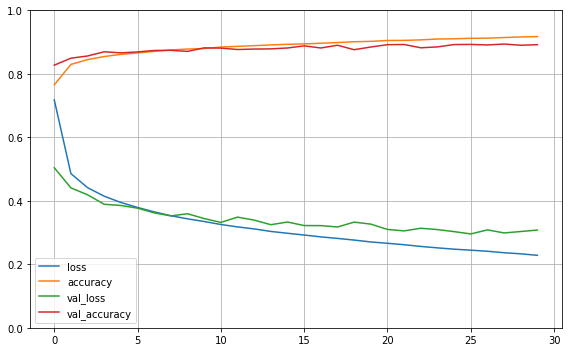

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

훈련하는 동안 훈련 정확도와 검증 정확도가 상승하는 것을 볼 수 있음.

반면 훈련손실과 검증손실은 감소함(매우 좋음). 또한 검증곡선이 훈련곡선과 가까움(크게 과대적합되지 않음).

이 경우는 훈련초기에 모델이 훈련세트보다 검증세트에서 더 좋은성능을 낸 것처럼 보임.

하지만 사실 그렇지 않음. 검증 손실은 에포크가 끝난 후에 계산되고 

훈련손실은 에포크가 진행되는 동안 계산됨.

따라서 훈련곡선을 볼 때 왼쪽으로 에포크의 절반만큼 이동해서 생각할 것.

=> 그렇게 놓고 보면 훈련초기에 훈련곡선과 검증곡선이 거의 완벽하게 일치함.

검증 손실이 여전히 감소한다면 모델이 아직 완전히 수렴되지 않음 -> 훈련을 더 해야할 듯

모델 성능이 만족스럽지 않다면 처음으로 되돌아가서 하이퍼파라미터를 튜닝할 필요가 있음.

처음엔 학습률 그다음은 옵티마이저를 테스트 해보세요.

(항상 다른 하이퍼파라미터를 바꾼후에는 학습률을 다시 튜닝해야함)

여전히 성능이 높지 않다? 층 개수, 층에 있는 뉴런 개수, 은닉층이 사용하는 활성화 함수와 

같은 모델의 하이퍼파라미터를 튜닝. 또는 배치크기와 같은 다른 하이퍼파라미터를 튜닝.

이 장 끝에서 하이퍼파라미터 튜닝을 배울 것임.

모델의 검증 정확도가 만족스럽다면 모델을 상용환경으로 배포하기 전에 테스트 세트로

모델을 평가해 일반화 오차를 추정해야 함. 이때 evaluate()를 사용.

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8759


[0.3432407081127167, 0.8758999705314636]

2장에서 보았듯이 검증세트보다 테스트세트에서 성능이 좀 낮은 것이 일반적임.

하이퍼파라미터를 튜닝한 곳이 테스트세트가 아니라 검증세트이기 때문.

그렇다고해서 테스트 세트에서 하이퍼파라미터를 튜닝하려고 해선 안 됨. 그렇지 않으면

일반화 오차를 매우 낙관적으로 추정하게 됨.

**모델을 사용해 예측을 만들기**

그다음 모델의 predict()를 사용해 새로운 샘플에 대해 예측을 만들 수 있음.

여기서는 실제로 새로운 샘플이 없기 때문에 테스트세트의 처음 3개 샘플을 사용하겠습니다.

In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

여기서 볼 수 있듯이 각 샘플에 대해 0~9까지 클래스마다 각각의 확률을 모델이 추정했음.

예를 들어 첫번째 이미지에 대해서는 클래스 9(앵클부츠)의 확률을 96%, 클래스 5의 확률을 3%,

클래스 7의 확률을 1%로 추정함. 다른 클래스 확률은 무시할 수준.

(실제로는 확률) 가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes()를 사용할 수 있음.

In [53]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [54]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

이 분류기는 3개의 이미지 모두 올바르게 분류함.

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 시퀀셜 API를 사용해 회귀용 다층 퍼셉트론 만들기 - 회귀 MLP

캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾸어 보겠습니다(2장에서 사용한 수정된 버전이 아니라 원본을 사용):

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

시퀀셜 API를 사용해 회귀용 MLP를 구축, 훈련, 평가, 예측하는 방법은 분류에서 했던 것과 매우 비슷.

주된 차이점은 출력층이 활성화함수가 없는 하나의 뉴런(하나의 값을 예측하기 때문)을 가진다는 것과

손실함수로 평균제곱오차를 사용한다는 것. 

이 데이터셋에는 잡음이 많기 때문에 과대적합을 막는 용도로 뉴런수가 적은 은닉층 하나만 사용.

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]    # 새로운 샘플이라고 생각
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.4656

입력과 출력이 여러개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할 때가 있음.

이를 위해 케라스는 함수형 API를 제공함.

### 함수형 API를 사용해 복잡한 모델 만들기 - 함수형 API

모든 신경망 모델이 단순하게 순서대로 나열되지는 않습니다. 어떤 신경망은 매우 복잡한 구조를 가집니다. 여러 개의 입력이 있거나 여러 개의 출력이 있습니다. 예를 들어 와이드 & 딥 신경망([논문](https://ai.google/research/pubs/pub45413) 참조)은 입력의 전체 또는 일부를 출력층에 바로 연결합니다.

이런 신경망을 만들어 캘리포니아 주택 문제를 해결해 봅시다.

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

코드를 한 줄씩 살펴보면

* 먼저 Input 객체를 만들어야 함. 이 객체는 shape과 dtype을 포함해 모델의 입력을 정의함.
  한 모델은 여러 개의 입력을 가질 수 있음.

* 30개의 뉴런과 ReLU 활성화함수를 가진 Dense 층을 만듦. 이 층은 만들어지자마자 입력과
  함께 함수처럼 호출됨. 이를 함수형 API라고 부르는 이유. 케라스에 층이 연결될 방법을
  알려주었을 뿐 아직 어떤 데이터도 처리하지 않았음.

* 두번째 은닉층을 만들고 또 다시 함수처럼 호풀. 첫번째 층의 출력을 전달한 점을 눈여겨 볼 것.

* Concatenate 층을 만들고 또 다시 함수처럼 호출해 두번째 은닉층의 출력과 입력을 연결.
  keras.layers.concatenate() 함수를 사용할 수도 있음. 이 함수는 Concatenate 층을 만들고
  주어진 입력으로 바로 호출함.

* 하나의 뉴런과 활성화함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용해 호출

* 마지막으로 사용할 입력과 출력을 지정해 케라스 Model을 만듦.

In [61]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4659 - val_loss: 0.4313

모델을 컴파일한 다음 훈련, 평가, 예측을 수행할 수 있음.

만약 일부 특성은 짧은 경로로 전달하고 다른 특성들은(중복될 수 있음) 깊은 경로로 전달하고 싶다면

어떻게 해야 할까? 이런 경우 1가지 방법은 여러입력을 사용하는 것.

예를 들어 (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됩니다.

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

이 코드 자체로 이해가 가능. 이렇게 모델이 복잡해지면 적어도 가장 중요한 층에는 이름을

붙이는 것이 좋음. 모델을 만들 때 inputs=[input_A, input_B]와 같이 지정.

모델 컴파일은 이전과 동일하지만 fit()를 호출할 때 하나의 입력 행렬 X_trian을

전달하는 것이 아니라 입력마다 하나씩 행렬의 튜플 (X_trian_A, X_trian_B)을 전달해야 함.

X_vaild에도 동일하게 적용됨. evaluate()나 predict()를 호출할 때 X_test와 X_new에도 동일.

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.4315

여러 개의 출력이 필요한 경우는 많음.

* 여러 출력이 필요한 작업일 때입니다. 예를 들어 그림에 있는 주요 물체를 분류하고 위치를 알아야
  할 수 있음. 회귀 작업(물체중심의 좌표와 너비, 높이를 찾음)과 분류작업을 함께 하는 경우임.

* 동일한 데이터에서 독립적인 여러 작업을 수행할 때임. 물론 작업마다 새로운 신경망을 
  훈련할 수 있지만, 작업마다 하나의 출력을 가진 단일 신경망을 훈련하는 것이 보통 더 나은 결과를 냄.
  신경망이 여러 작업에 걸쳐 유용한 특성을 학습할 수 있기 때문. ex) 얼굴 사진으로 

  다중작업분류를 수행가능. 한 출력은 사람의 얼굴 표정을 분류하고 다른 출력은 안경을 썼는지 구별가능.

* 또 다른 예는 규제 기법으로 사용하는 경우(즉, 과대적합을 감소하고 모델의 일반화 성능을 높이도록
  훈련에 제약을 가함). ex) 신경망 구조 안에 보조 출력을 추가할 수 있음. 보조 출력을 사용해 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는지 확인 가능.

규제를 위한 보조 출력 추가하기:

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

각 출력은 자신만의 손실함수가 필요함. 따라서 모델을 컴파일할 때 손실의 리스트를 전달해야 함.

기본적으로 케라스는 나열된 손실을 모두 더해 최종손실을 구해 훈련에 사용함.

보조출력보다 주출력에 더 관심이 많다면(보조출력은 규제로만 사용되므로),

주출력의 손실에 더 많은 가중치를 부여해야 함. 다행히 모델을 컴파일할 때 손실 가중치를 지정할 수 있음.

In [67]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

이제 모델을 훈련할 때 각 출력에 대한 레이블을 제공해야 함. 여기에는 주출력과 보조출력이

같은 것을 예측해야 하므로 동일한 레이블을 사용함. 따라서 y_train 대신 (y_train, y_train) 전달.

(y_vaild와 y_test도 동일함.)

In [68]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

모델 평가시 케라스는 개별손실과 함께 총 손실을 반환함.

비슷하게 predict() 메서드는 각 출력에 대한 예측 반환.

In [70]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


### 서브클래싱 API로 동적 모델 만들기

어떤 모델은 반복문을 포함하고 다양한 크기를 다루어야 하며 조건문을 가지는 등 여러가지

동적인 구조를 필요로 함. 이런 경우에 좀 더 명령형 프로그래밍 스타일이 필요하다면 서브클래싱 API가 정답.

|

간단히 Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만듦. 그다음 call()안에 수행하려는

연산을 기술함. 예를 들어 WideAndDeepModel 클래스의 인스턴스는 앞서 함수형 API로 만든 모델과

동일한 기능을 수행. 이전에 했던것처럼 이 인스턴스를 사용해 모델 컴파일, 훈련, 평가, 예측 수행가능.

In [71]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [72]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

이 예제는 함수형 API와 매우 비슷하나 Input 클래스의 객체를 만들 필요가 없음.

대신 call()의 input 매개변수를 사용함. 생성자에 있는 층 구성과 call()에 있는 정방향 계산을 분리함.

주된 차이점은 call()안에서 원하는 어떤 계산도 사용가능. for문, if문, 텐서플로 저수준 연산을 사용가능.

상상력이 부족할 뿐 (12장 참조)! 새로운 아이디어를 실험하는 연구자들에게 잘 맞는 매우 훌륭한 API

|

하지만 유연성이 높아지면 그에 따른 비용 발생. call()안에 모델구조가 숨겨져 있어 케라스가

이를 쉽게 분석할 수 없음. 즉, 모델 저장및 복사 불가능.

summary()를 호출하면 층의 목록만 나오고 층 간의 연결정보 확인불가.

케라스가 타입과 크기를 미리 확인할 수 없어 실수 발생하기 쉬움.

높은 유연성이 필요하지 않다면 그냥 함수형 API와 시퀀셜 API가 좋음.

### 모델 저장과 복원

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [75]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 864us/step - loss: 0.4382


In [76]:
model.save("my_keras_model.h5")

케라스는 HDF5 포맷을 사용해 모델 구조와 층의 모든 모델 파라미터를 저장.

또한 옵티마이저도 저장. (19장에서는 SavedModel에 대해 알아볼 예정.)

일반적으로 하나의 파이썬 스크립트에서 모델을 훈련하고 저장한 다음 

하나이상의 스크립트(또는 웹 서비스)에서 모델을 로드하고 예측을 만드는데 활용.

In [77]:
model = keras.models.load_model("my_keras_model.h5")

##### CAUTION_

서브클래싱에선느 이 방식을 사용할 수 없음. save_weights()와 load_weights()를 사용해

모델파라미터 저장하고 복원가능. 그 외에는 전부 수동 저장 및 복원

### 콜백 사용하기 - 일정간격으로 체크포인트를 저장

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

훈련하는 동안 검증세트를 사용하면 ModelCheckpoint를 만들 때 save_best_only=True로

지정할 수 있음. 이렇게 하면 최상의 검증 세트 점수에서만 모델을 저장. 오랜 훈련시간으로

훈련세트에 과대적합될 걱정을 하지 않아도 됨. 훈련이 끝난 후 마지막에 저장된 모델을 복원하면 됨.

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 아래 코드는 조기 종료를 구현하는 방법 (4장에서 소개한)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 919us/step - loss: 0.4382


조기종료를 구현하는 또 다른방법은 EarlyStopping 콜백을 사용하는 것.

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3976 - val_lo

그 외에도 다른 종류의 콜백이 많이 있음 https://keras.io/callbacks

더 많은 제어를 원한다면 사용자 정의 콜백을 만들 수 있음.

In [82]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [83]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

336/363 [==========================>...] - ETA: 0s - loss: 0.3294
val/train: 1.08
363/363 [==============================] - 1s 1ms/step - loss: 0.3302 - val_loss: 0.3559


### 텐서보드를 사용해 시각화하기

텐서보드는 매우 좋은 인터렉티브 시각화 도구. 훈련하는 동안 학습곡선을 그리거나 

여러 실행 간의 학습곡선을 비교하고 계산그래프 시각화와 훈련통계분석을 수행할 수 있음.

|

텐서보드를 사용하려면 프로그램을 수정해 이벤트 파일이라는 특별한 이진로그파일에 

시각화하려는 데이터를 출력해야함. 

먼저 텐서보드 로그를 위해 사용할 루트 로그 디렉토리를 정의하겠습니다. 현재 날짜와 시간을 사용해 실행할때마다 다른 서브디렉토리 경로를 생성하는 간단한 함수도 만들겠습니다. 테스트하는 하이퍼파라미터 값과 같은 추가적인 정보를 로그 디렉토리 이름으로 사용할 수 있음. 이렇게 하면 텐서보드에서 어떤로그인지 구분하기 편리함.

In [90]:
import os
root_logdir = os.path.join(os.curdir, "my_logs") # 데이터를 넣을 부모 디렉토리 생성

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_04_25-21_48_15'

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [93]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

실행마다 하나의 디렉토리가 생성됨. 그 아래 훈련 로그를 위한 서브디렉토리와 검증 로그를 위한

서브디렉토리가 포함됨. 둘 다 이벤트 파일을 담고 있음. 훈련로그는 프로파일링 트레이스 파일도 포함.

텐서보드가 이 파일을 사용해 각 부분에서의 소요 시간을 보여주므로 성능 병목지점을 찾는데 도움됨.

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [94]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11284), started 0:27:31 ago. (Use '!kill 11284' to kill it.)

서버가 실행되면 웹 브라우저를 열고 http://localhost:6006/#scalars 로 접속해 그래프 확인

## 신경망 하이퍼파라미터 튜닝하기

2장에서 했던 것처럼 GridSearchCV나 RandomizedSearchCV를 사용해 하이퍼파라미터 공간을 탐색 가능.

이렇게 하려면 케라스 모델을 사이킷런 추정기처럼 보이도록 바꿔야 함.

먼저 일련의 하이퍼파라미터로 케라스 모델을 만들고 컴파일하는 함수를 만듦.

In [95]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

이 함수는 주어진 입력크기와 은닉층의 개수, 뉴런 개수로(한 개의 출력 뉴런만 있는) 단변량 회귀를

위한 간단한 Sequential 모델을 만듦. 그리고 지정된 학습률을 사용하는 SGD 옵티마이저로

모델을 컴파일함. 사이킷런과 마찬가지로 가능한 하이퍼파라미터에 적절한 기본값을 설정하는 것이 좋음.

In [97]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\NICE\AppData\Local\Temp\ipykernel_12448\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


KerasRegressor 객체는 build_model() 함수로 만들어진 케라스 모델을 감싸는 간단한 래퍼임.

이 객체를 만들 때 어떤 하이퍼파라미터도 지정하지 않았으므로 build_model()에 정의된

기본 하이퍼파라미터를 사용할 것. 이제 일반적인 사이킷런 회귀 추정기처럼 메서드로 평가하고

predict() 메서드로 예측을 만들 수 있음.

In [98]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_l

fit()에 지정한 모든 매개변수는 케라스 모델로 전달됨. 사이킷런은 손실이 아니라

점수를 계산하기 때문에(즉, 높을수록 좋음) 출력 점수는 음수의 MSE임.

|

모델 하나를 훈련하고 평가하려는 것이 아니라 수백 개의 모델을 훈련하고 검증세트에서

최상의 모델을 선택해야함. 하이퍼파라미터가 많으므로 그리드탐색보다 랜덤탐색이 더 낫다.

은닉층 개수, 뉴런 개수, 학습률을 사용해 하이퍼파라미터 탐색을 수행해봄.

In [99]:
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024B4742CD90>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

이 코드는 래퍼로 감싸진 케라스 모델에 전달한 추가적인 매개변수가 fit()에 있는 것을

제외하고는 2장에서 했던 것과 동일함. RandomizedSearchCV는 k-겹 교차검증을 사용하기 때문에

X_valid와 y_valid를 사용하지 않음. 이 데이터는 조기 종료에만 사용됨.

|

랜덤탐색은 하드웨어와 데이터셋의 크기, 모델의 복잡도, n_iter, cv 매개변수에 따라 몇 시간이 걸릴 수 있음.

실행이 끝나면 랜덤탐색이 찾은 최상의 하이퍼파라미터와 훈련된 케라스 모델을 얻을 수 있음.

In [101]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [102]:
rnd_search_cv.best_score_

-0.31833014885584515

In [103]:
model = rnd_search_cv.best_estimator_.model
model

### 은닉층 개수

### 은닉충의 뉴런 개수

### 학습률, 배치 크기 그리고 다른 하이퍼파라미터

**활성화 함수**

**반복 횟수**